# 单变量线性回归

吴明晖

浙江大学城市学院

2018.10

<h1>目录<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#使用Tensorflow进行算法设计与训练的核心步骤" data-toc-modified-id="使用Tensorflow进行算法设计与训练的核心步骤-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>使用Tensorflow进行算法设计与训练的核心步骤</a></span></li><li><span><a href="#Tensorflow实现单变量线性回归" data-toc-modified-id="Tensorflow实现单变量线性回归-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Tensorflow实现单变量线性回归</a></span><ul class="toc-item"><li><span><a href="#生成数据" data-toc-modified-id="生成数据-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>生成数据</a></span></li><li><span><a href="#构建模型" data-toc-modified-id="构建模型-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>构建模型</a></span></li><li><span><a href="#训练模型" data-toc-modified-id="训练模型-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>训练模型</a></span></li><li><span><a href="#进行预测" data-toc-modified-id="进行预测-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>进行预测</a></span></li></ul></li><li><span><a href="#小结" data-toc-modified-id="小结-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>小结</a></span></li></ul></div>

# 使用Tensorflow进行算法设计与训练的核心步骤

- ** （1）生成数据 **
- ** （2）构建模型 **
- ** （3）训练模型 **
- ** （4）进行预测 **

上述步骤是我们使用Tensorflow进行算法设计与训练的核心步骤，贯穿于后面介绍的具体实战中。<br> 本章用一个简单的例子来讲解这几个步骤。



# 有监督机器学习过程示意图

<img src="机器学习过程示意图.png">

# Tensorflow实现单变量线性回归

假设我们要学习的函数为线性函数$ y=2x+1 $

## 生成数据

In [1]:
#在Jupyter中，使用matplotlib显示图像需要设置为 inline 模式，否则不会现实图像
%matplotlib inline

import matplotlib.pyplot as plt # 载入matplotlib
import numpy as np # 载入numpy
import tensorflow as tf # 载入Tensorflow

np.random.seed(5)


** 首先，生成输入数据。 ** <br> 我们需要构造满足这个函数的$x$和$y$同时加入一些不满足方程的噪声.

In [2]:
#直接采用np生成等差数列的方法，生成100个点，每个点的取值在-1~1之间

x_data = np.linspace(-1, 1, 100) 

# y = 2x +1 + 噪声， 其中，噪声的维度与x_data一致

y_data = 2 * x_data + 1.0 + np.random.randn(*x_data.shape) * 0.4  

** 利用matplotlib画图 **

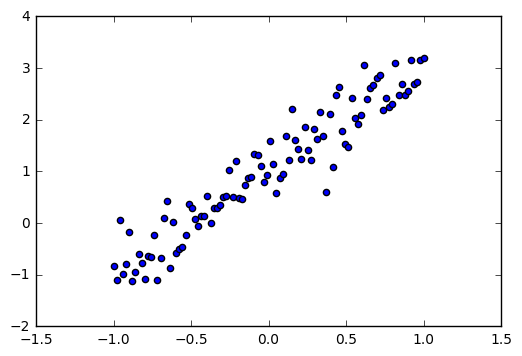

In [3]:
#画出随机生成数据的散点图

plt.scatter(x_data, y_data) 

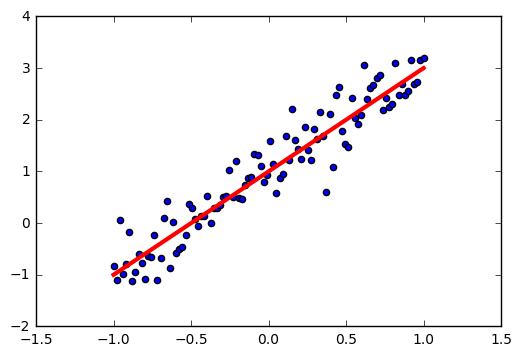

In [4]:
#画出随机生成数据的散点图
plt.scatter(x_data, y_data) 

# 画出我们想要学习到的线性函数 y = 2x +1

plt.plot (x_data, 1.0 + 2 * x_data, color = 'red',linewidth=3) 

## 构建模型

** 定义$x$和$y$的占位符 **

In [5]:
# 定义训练数据的占位符，x是特征值，y是标签值

x = tf.placeholder("float", name = "x") 
y = tf.placeholder("float", name = "y")

** 构建回归模型 **

In [6]:
def model(x, w, b):
    return tf.multiply(x, w) + b 

** 创建变量 **
<br>
- Tensorflow变量的声明函数是tf.Variable
- tf.Variable的作用是保存和更新参数
- 变量的初始值可以是随机数、常数，或是通过其他变量的初始值计算得到

In [7]:
# 构建线性函数的斜率，变量w
w = tf.Variable(1.0, name="w0")

# 构建线性函数的截距，变量b
b = tf.Variable(0.0, name="b0")   

In [8]:
# pred是预测值，前向计算
pred = model(x, w, b) 

## 训练模型

** 设置训练参数 **

In [9]:
# 迭代次数（训练轮数）
train_epochs = 10

# 学习率
learning_rate = 0.05 

# 控制显示loss值的粒度
display_step = 10

** 关于学习率（learning_rate）的设置 **<br>
- 学习率的作用：控制参数更新的幅度。
- 如果学习率设置过大，可能导致参数在极值附近来回摇摆，无法保证收敛。
- 如果学习率设置过小，虽然能保证收敛，但优化速度会大大降低，我们需要更多迭代次数才能达到较理想的优化效果。

** 定义损失函数 **
<br>
- 损失函数用于描述预测值与真实值之间的误差，从而指导模型收敛方向
- 常见损失函数：均方差（Mean Square Error, MSE）和交叉熵（cross-entropy）

In [10]:
# 采用均方差作为损失函数

loss_function = tf.reduce_mean(tf.square(y-pred))  

** 选择优化器 **

In [11]:
# 梯度下降优化器

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_function)

** 声明会话 **

In [12]:
sess = tf.Session()

** 变量初始化 **
- 在真正执行计算之前，需将所有变量初始化
- 通过** tf.global_variables_initializer **函数可实现对所有变量的初始化

In [13]:
init = tf.global_variables_initializer()

sess.run(init)

** 执行训练 **

Train Epoch: 01 Step: 010 loss= 0.007021904
Train Epoch: 01 Step: 020 loss= 0.186607897
Train Epoch: 01 Step: 030 loss= 0.024833022
Train Epoch: 01 Step: 040 loss= 0.620799541
Train Epoch: 01 Step: 050 loss= 0.006301077
Train Epoch: 01 Step: 060 loss= 0.023637433
Train Epoch: 01 Step: 070 loss= 0.354419798
Train Epoch: 01 Step: 080 loss= 0.027936857
Train Epoch: 01 Step: 090 loss= 0.029015331
Train Epoch: 01 Step: 100 loss= 0.106556907
Train Epoch: 02 Step: 010 loss= 0.179423183
Train Epoch: 02 Step: 020 loss= 0.067458346
Train Epoch: 02 Step: 030 loss= 0.000281519
Train Epoch: 02 Step: 040 loss= 0.344065875
Train Epoch: 02 Step: 050 loss= 0.021391280
Train Epoch: 02 Step: 060 loss= 0.006406436
Train Epoch: 02 Step: 070 loss= 0.142010629
Train Epoch: 02 Step: 080 loss= 0.000233675
Train Epoch: 02 Step: 090 loss= 0.094913408
Train Epoch: 02 Step: 100 loss= 0.052370854
Train Epoch: 03 Step: 010 loss= 0.044097763
Train Epoch: 03 Step: 020 loss= 0.082669340
Train Epoch: 03 Step: 030 loss= 

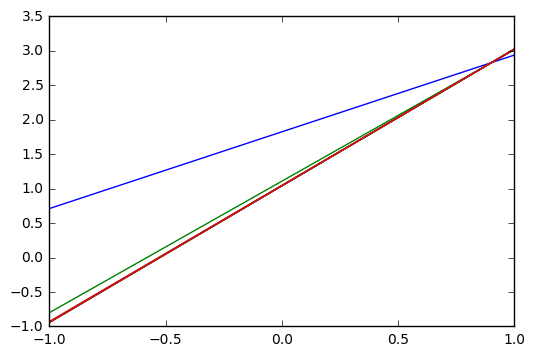

In [14]:
# 开始训练，轮数为 epoch，采用SGD随机梯度下降优化方法

for epoch in range(train_epochs):
    step = 0
    for xs,ys in zip(x_data, y_data):
        _, loss=sess.run([optimizer,loss_function], feed_dict={x: xs, y: ys}) 
        
        # 显示损失值 loss
        # display_step：控制报告的粒度
        # 例如，如果 display_step 设为 2 ，则将每训练2个样本输出一次损失值
        # 与超参数不同，修改 display_step 不会更改模型所学习的规律
        
        step=step+1
        if step % display_step == 0:
            print("Train Epoch:", '%02d' % (epoch+1), "Step: %03d" % (step),"loss=", "{:.9f}".format(loss))
        
    b0temp=b.eval(session=sess)
    w0temp=w.eval(session=sess)
    plt.plot (x_data, w0temp * x_data + b0temp  )# 画图



从上图可以看出，由于本案例所拟合的模型较简单，训练3次之后已经接近收敛。<br> 对于复杂模型，需要更多次训练才能收敛。

In [15]:
# logdir改为自己机器上的合适路径
logdir='D:/log'

#生成一个写日志的writer，并将当前的TensorFlow计算图写入日志。

writer = tf.summary.FileWriter(logdir,tf.get_default_graph())
writer.close()

## 计算图

<img src= "计算图.png">

** 打印结果 **

In [16]:
print ("w：", sess.run(w)) # w的值应该在2附近 
print ("b：", sess.run(b)) # b的值应该在1附近 

w： 1.9823
b： 1.04201


** 可视化 **

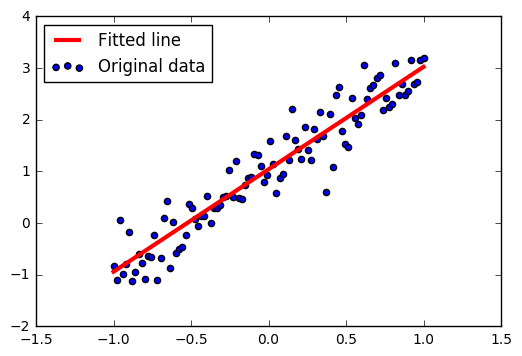

In [17]:
plt.scatter(x_data,y_data,label='Original data')
plt.plot (x_data, x_data * sess.run(w) + sess.run(b),\
          label='Fitted line',color='r', linewidth=3)
plt.legend(loc=2)# 通过参数loc指定图例位置

## 进行预测

In [18]:
x_test = 3.21

predict = sess.run(pred, feed_dict={x: x_test})
print("预测值：%f" % predict)

target = 2 * x_test + 1.0
print("目标值：%f" % target)

预测值：7.405184
目标值：7.420000


In [19]:
x_test = 3.21
predict = sess.run(w) * x_test + sess.run(b)
print("预测值：%f" % predict)

预测值：7.405184


** 以上是利用Tensorflow训练一个线性模型并进行预测的完整过程。<br> 通过逐渐降低损失值loss来训练参数$w$和$b$拟合 $y = 2x + 1$中的系数2和1。 ** 

# 小结

** 通过一个简单的例子介绍了利用Tensorflow实现机器学习的思路，重点讲解了下述步骤： ** <br>
** - （1）生成人工数据集及其可视化 ** <br>
** - （2）构建线性模型 **<br>
** - （3）定义损失函数 **<br>
** - （4）最小化损失函数 **<br>
** - （5）训练结果的可视化 **<br>
** - （6）利用学习到的模型进行预测 **

